PRA UAS

In [ ]:
pip install ucimlrepo


In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

Penjelasan Setiap Fitur :

1. Age = umur pasien
2. Sex = jenis kelamin (1 = laki-laki dan 0 = perempuan)
3. Chest pain type (0–3):
0 = typical angina,
1 = atypical angina,
2 = non-anginal pain,
3 = asymptomatic
4. Trestbps = Resting blood pressure (tekanan darah istirahat) dalam mm Hg
5.Chol = Serum cholesterol dalam mg/dl
6. Fbs = Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
7. 	Resting electrocardiographic results:
0 = normal
1 = ST-T wave abnormality
2 = left ventricular hypertrophy
8. Thalach = Maximum heart rate achieved
9. Exang= exercise-induced angina (1 = yes; 0 = no)
10. Oldpeak ST depression induced by exercise relative to rest
11. Slope of the peak exercise ST segment:
0 = upsloping,
1 = flat,
2 = downsloping
12. Ca = Number of major vessels (0–3) colored by fluoroscopy
13. Thal = 3 = normal; 6 = fixed defect; 7 = reversible defect
14. Target = Diagnosis of heart disease (0 = tidak ada penyakit, 1 = ada penyakit)




In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Mengecek 5 data teratas
print(X.head())

# Menggabungkan fitur dan target untuk analisis lengkap
data = pd.concat([X, y], axis=1)

# 1. Mengecek missing value
print(data.isnull().sum())

# 2. Statistik deskriptif
print(data.describe())

# 3. Mendeteksi outlier dengan IQR (contoh pada kolom 'chol')
Q1 = data['chol'].quantile(0.25)
Q3 = data['chol'].quantile(0.75)
IQR = Q3 - Q1
outliers = data[(data['chol'] < Q1 - 1.5*IQR) | (data['chol'] > Q3 + 1.5*IQR)]
print(f"Jumlah outlier pada kolom 'chol': {len(outliers)}")

# 4. Cek distribusi target
print(data['num'].value_counts())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  
0  0.0   6.0  
1  3.0   3.0  
2  2.0   7.0  
3  0.0   3.0  
4  0.0   3.0  
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.68976

Korelasi antar Fitur

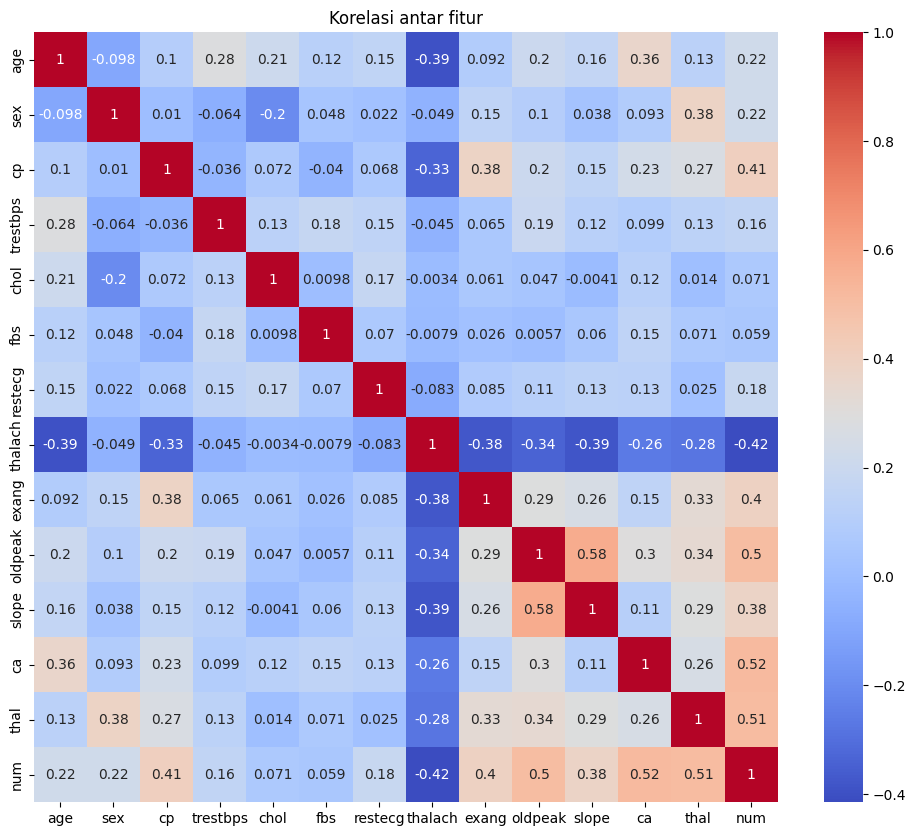

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi antar fitur")
plt.show()


Distribusi Target

In [ ]:
sns.countplot(data=data, x='num')
plt.title('Distribusi Pasien Berdasarkan Status Penyakit Jantung')
plt.show()

Boxplot untuk deteksi outlier

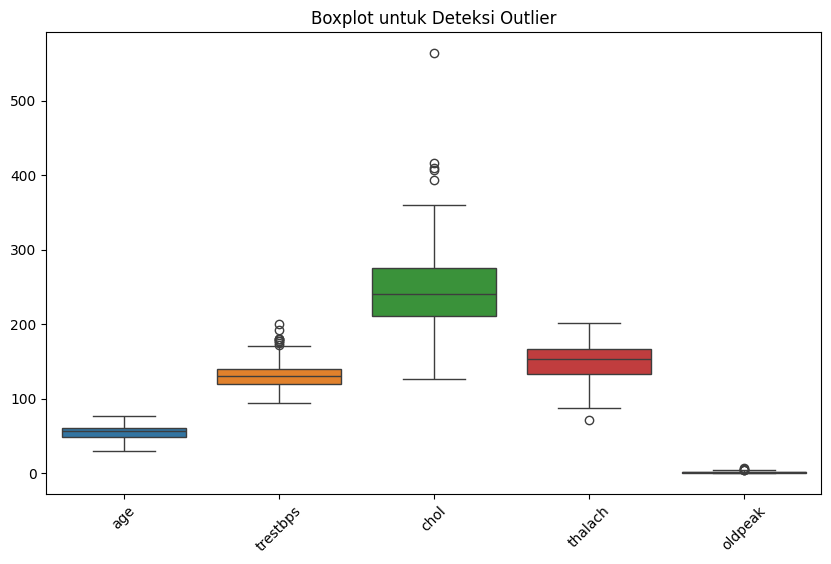

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])
plt.title("Boxplot untuk Deteksi Outlier")
plt.xticks(rotation=45)
plt.show()
